In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset

import warnings
warnings.filterwarnings("ignore")

import os

The below csv is the '2021-01.csv' file from the following website: https://research.stlouisfed.org/econ/mccracken/fred-databases/

This represents January 2021 vintage McCracken US economic data to roughly synch the economic data with the available stock cross-section data.

In [2]:
path = "C:/Users/andrew_lazzeri/Desktop/Project_Files/Data Upload/McCracken_Data.csv"
econ_df = pd.read_csv(path)
econ_df.tail()

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
752,8/1/2021,17963.638,14318.1,124.496,1556107.0,622383.0,101.0025,99.9660,100.8704,100.3032,...,103.225,124.913,26.73,30.70,24.02,70.3,366753.45,756588.86,5350.5075,17.0618
753,9/1/2021,17725.672,14342.4,124.826,1563118.0,626999.0,100.0168,99.7688,100.3718,99.7985,...,103.808,125.243,26.89,30.82,24.11,72.8,370236.20,758672.57,5414.4368,19.7806
754,10/1/2021,17717.237,14365.5,125.920,1570165.0,638102.0,101.2503,100.1800,100.8151,99.8102,...,105.066,125.661,26.91,30.99,24.14,71.7,370388.30,758379.74,5531.1634,17.7838
755,11/1/2021,17697.875,14346.3,125.638,1565491.0,639067.0,101.9970,101.1497,101.7647,101.0963,...,106.296,126.257,27.01,31.08,24.22,67.4,371479.59,759570.02,5603.1325,19.1586
756,12/1/2021,17678.541,14342.8,124.351,NaN,626833.0,101.8926,100.5838,101.1014,100.1636,...,106.652,126.760,27.13,31.20,24.33,70.6,NaN,NaN,5690.5987,21.2985


In [3]:
econ_df_key = econ_df.iloc[0, :]
econ_df_values = pd.DataFrame(econ_df.iloc[1::, :].values, columns = econ_df.columns)
dates = pd.date_range(start = '1959-01-31', end = '2021-12-31', freq = 'M')
econ_df_values['Dates'] = dates
econ_df_values = econ_df_values.set_index('Dates')
econ_df_values = econ_df_values.drop('sasdate', axis = 1)
econ_df_values = econ_df_values.astype(float)

In [10]:
pd.set_option('use_inf_as_na',True)

def transform_2(series):
    """
    Produces the transform for group 2 - 1st difference of the series
    """
    return series - series.shift(1)

def transform_3(series):
    """
    Produces the transform for group 3 - 2nd difference of the series
    """
    delta_xt = series - series.shift(1)
    delta_2xt = delta_xt - delta_xt.shift(1)
    return delta_2xt

def transform_4(series):
    """
    Produces the transform for group 4 - logged series
    """
    return np.log(series)

def transform_5(series):
    """
    Produces the transform for group 5 - 1st difference of logged series
    """
    log_series = np.log(series)
    return log_series - log_series.shift(1)

def transform_6(series):
    """
    Produces the transform for group 6 - 2nd differnce of logged series
    """
    log_series = np.log(series)
    diff_log = log_series - log_series.shift(1)
    diff2_log = diff_log - diff_log.shift(1)
    return diff2_log

def transform_7(series):
    """
    Produces the transform for group 7 - percentage change of the series
    """
    return series/series.shift(1) - 1


In [32]:

def df_transform(df, start_date, end_date, econ_df_key):
    """
    Applies the above transforms to the dataframe columns based on pre-specified column keys
    """
    iter_df = df.copy()
        
    #Group columns by desired transform
    col_1 = [idx for idx in econ_df_key[econ_df_key == 1].index]
    col_2 = [idx for idx in econ_df_key[econ_df_key == 2].index]
    col_3 = [idx for idx in econ_df_key[econ_df_key == 3].index]
    col_4 = [idx for idx in econ_df_key[econ_df_key == 4].index]
    col_5 = [idx for idx in econ_df_key[econ_df_key == 5].index]
    col_6 = [idx for idx in econ_df_key[econ_df_key == 6].index]
    col_7 = [idx for idx in econ_df_key[econ_df_key == 7].index]
    
    data_df = pd.DataFrame(iter_df.index)

    #Apply Group 1 Transforms 
    col_1_df = iter_df[col_1]
    col_1_df[col_1] = col_1_df[col_1_df.index > start_date]
    
    #Apply Group 2 Transforms 
    col_2_df = iter_df[col_2]
    col_2_df[col_2] = col_2_df[col_2].apply(transform_2)
    
    #Apply Group 3 Transforms 
    col_3_df = iter_df[col_3]
    col_3_df[col_3] = col_3_df[col_3].apply(transform_3)
    
    #Apply Group 4 Transforms 
    col_4_df = iter_df[col_4]
    col_4_df[col_4] = col_4_df[col_4].apply(transform_4)
    
    #Apply Group 5 Transforms 
    col_5_df = iter_df[col_5]
    col_5_df[col_5] = col_5_df[col_5].apply(transform_5)
    
    #Apply Group 6 Transforms 
    col_6_df = iter_df[col_6]
    col_6_df[col_6] = col_6_df[col_6].apply(transform_6)
    
    #Apply Group 7 Transforms 
    col_7_df = iter_df[col_7]
    col_7_df[col_7] = col_7_df[col_7].apply(transform_7)
        
    join_dfs = [col_2_df, col_3_df, col_4_df, col_5_df, col_6_df, col_7_df]
    
    
    agg_df = col_1_df
    for i in range(len(join_dfs)):
        agg_df = agg_df.join(join_dfs[i])

    agg_df = agg_df[(agg_df.index >= start_date) & (agg_df.index <= end_date)]
    return col_1_df, col_2_df, col_4_df, col_5_df, col_6_df, col_7_df, agg_df

col_1_df, col_2_df, col_4_df, col_5_df, col_6_df, col_7_df, agg_df = df_transform(econ_df_values, '1959-12-31', '2022-07-31', econ_df_key)

In [33]:
econ_df_key.value_counts().sum()

128

In [34]:
agg_df.shape

(745, 127)

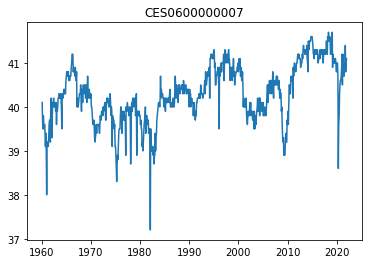

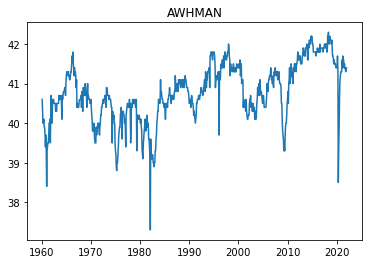

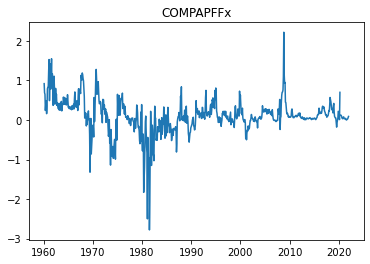

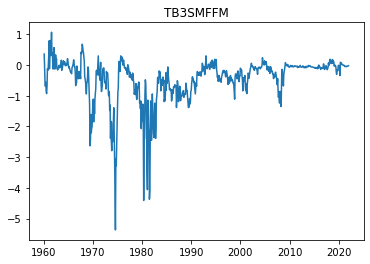

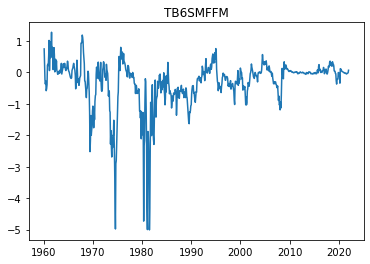

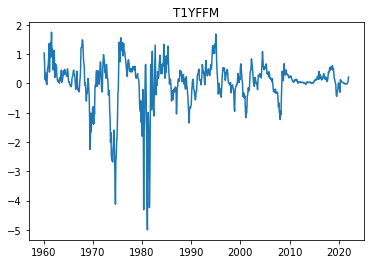

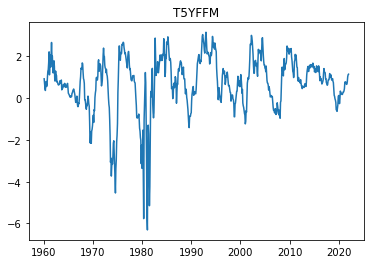

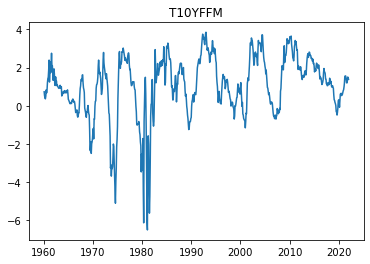

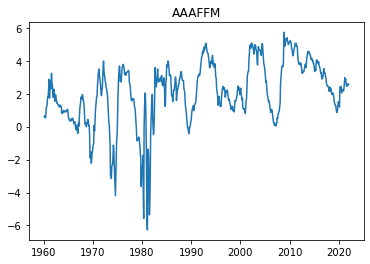

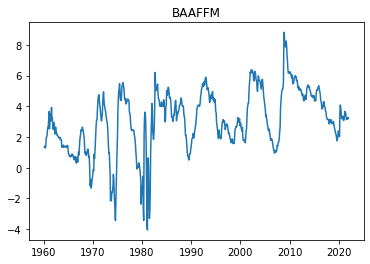

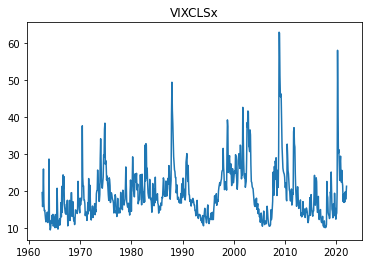

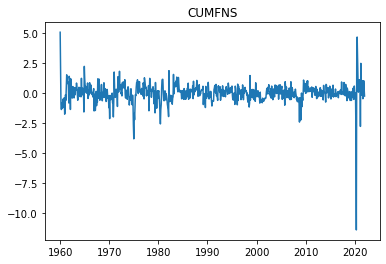

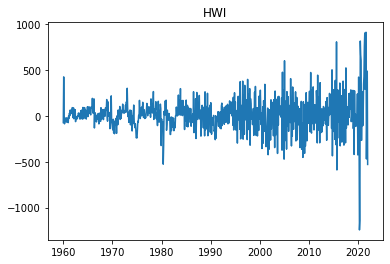

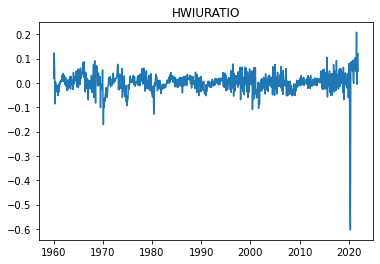

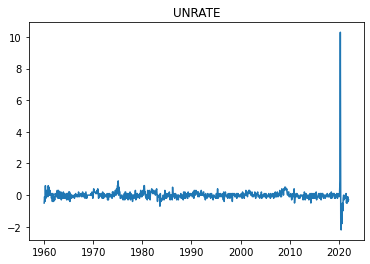

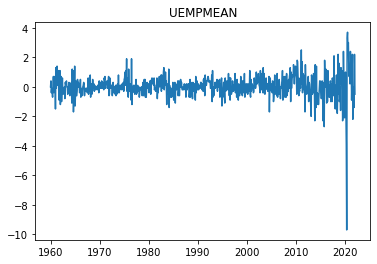

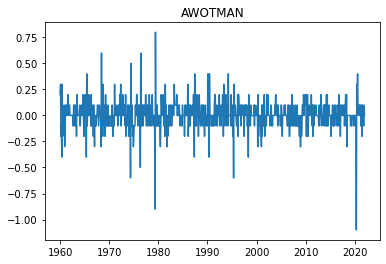

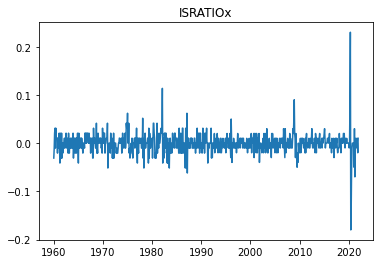

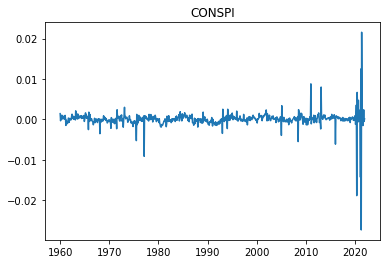

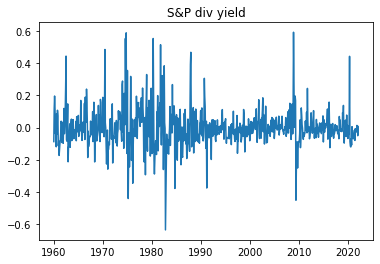

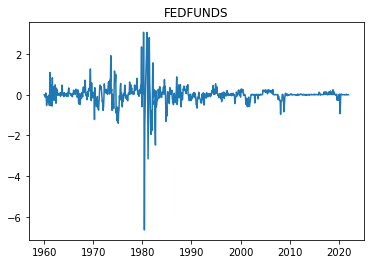

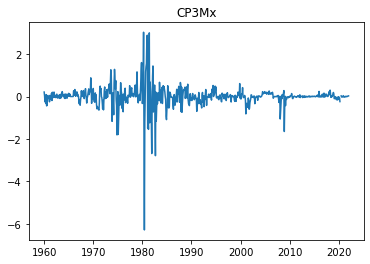

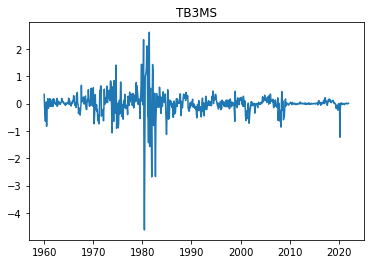

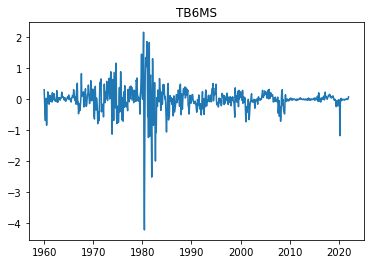

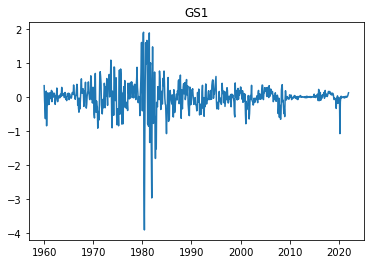

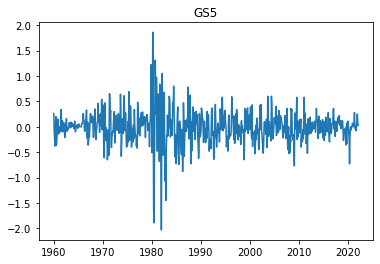

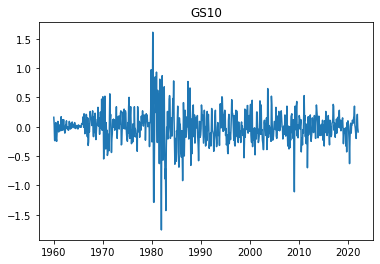

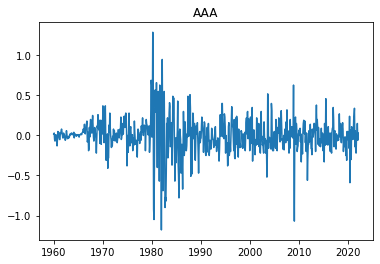

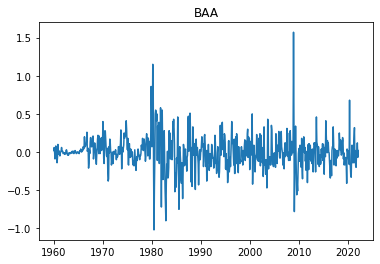

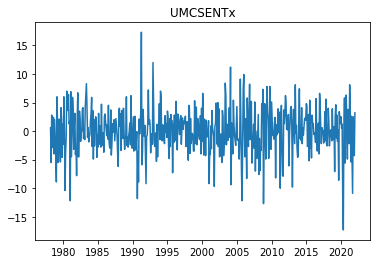

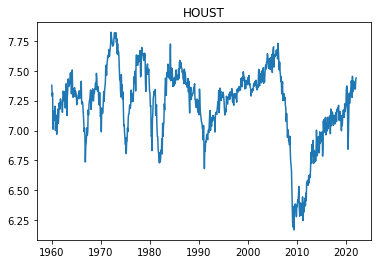

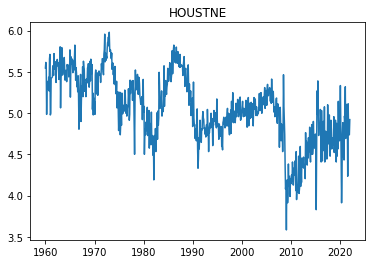

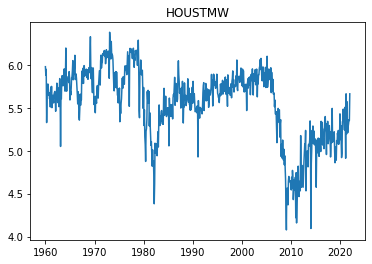

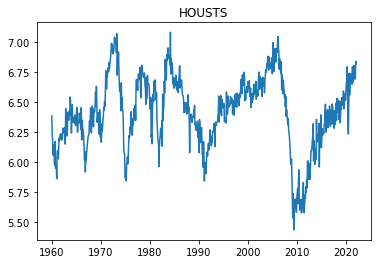

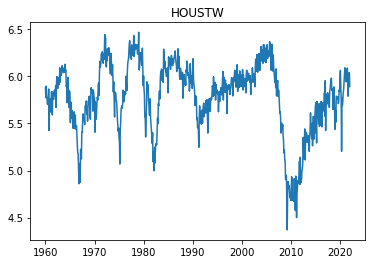

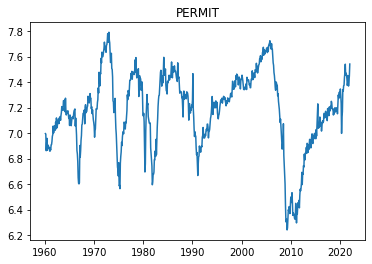

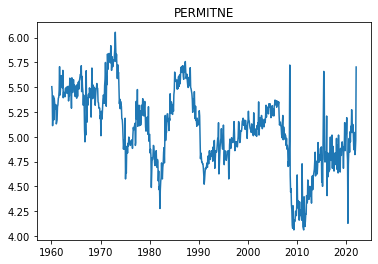

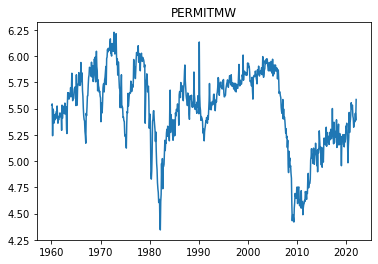

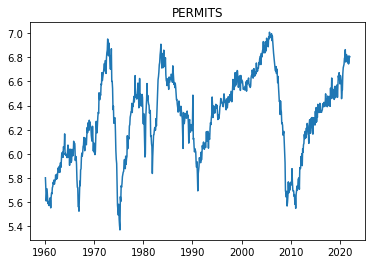

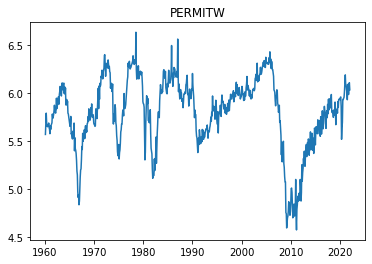

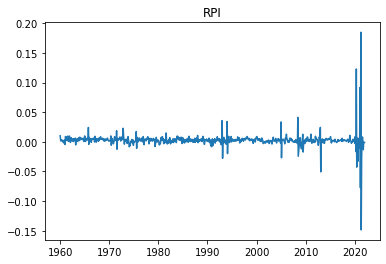

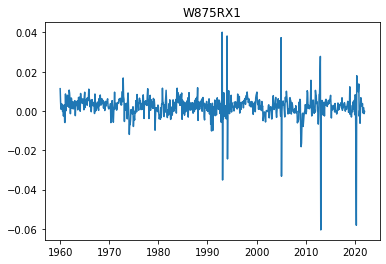

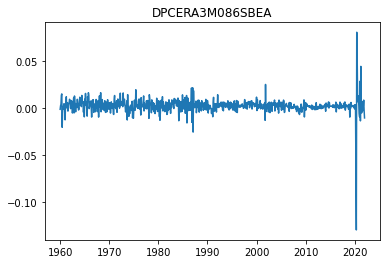

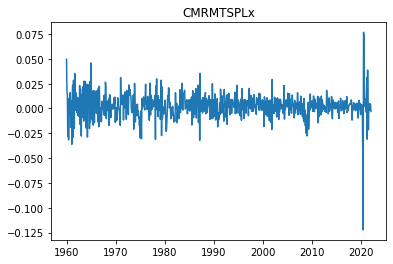

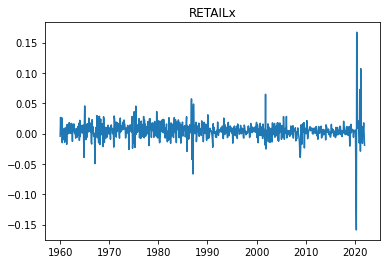

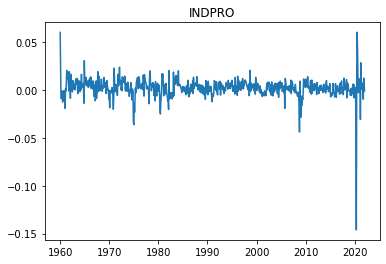

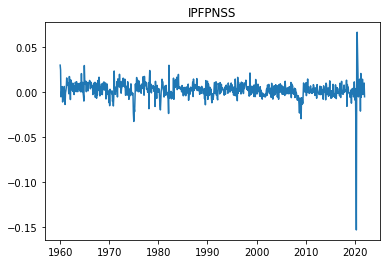

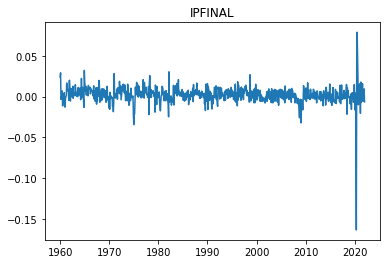

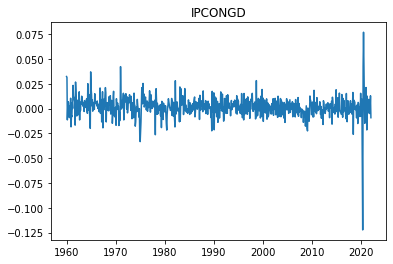

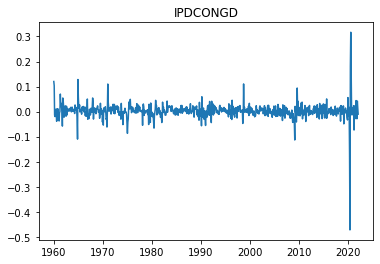

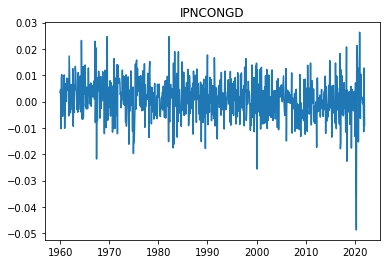

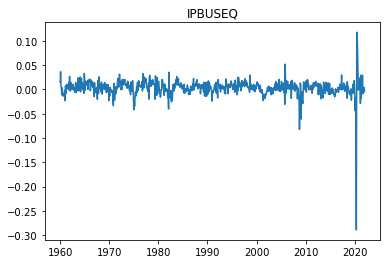

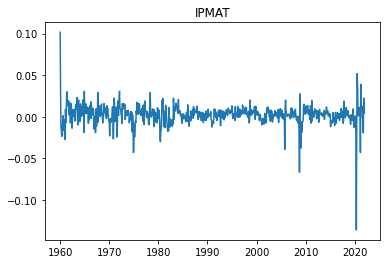

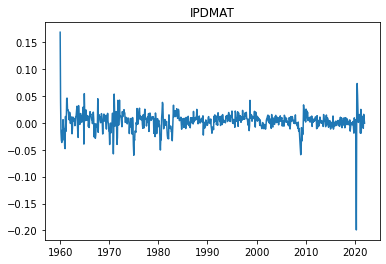

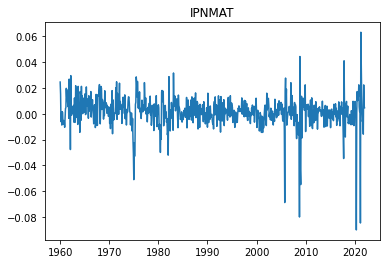

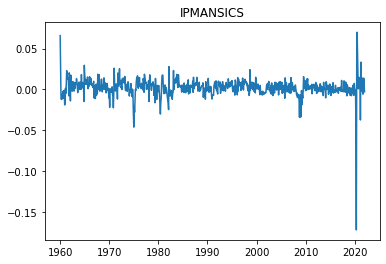

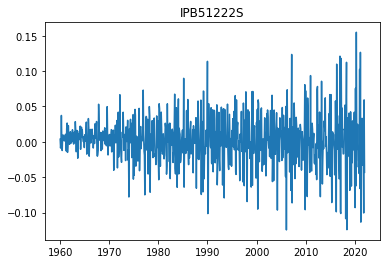

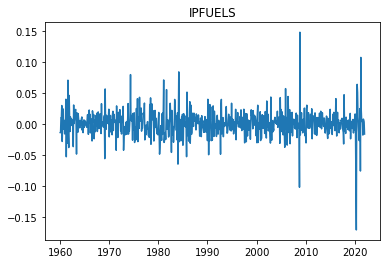

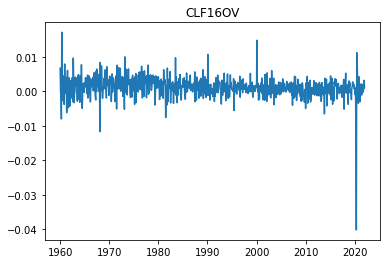

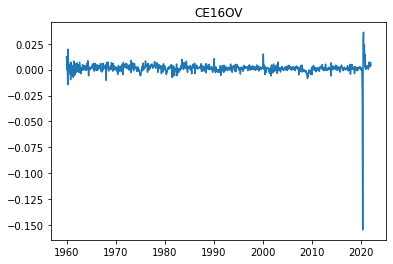

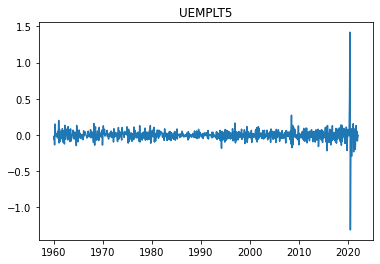

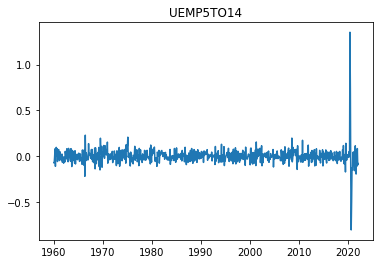

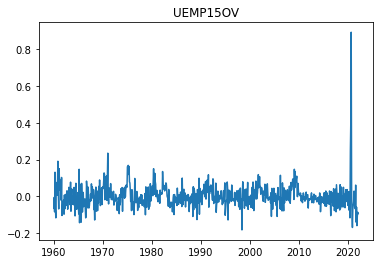

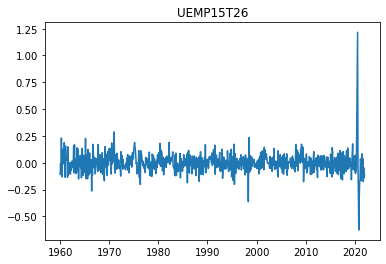

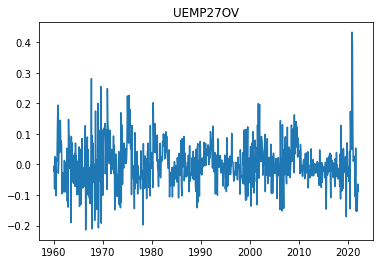

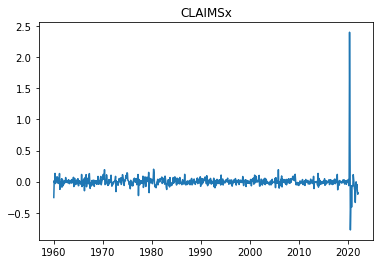

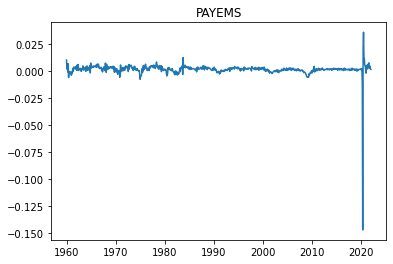

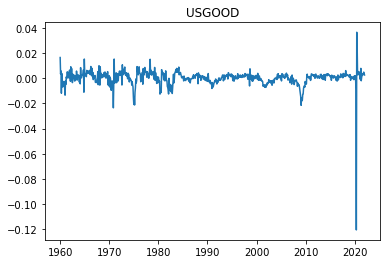

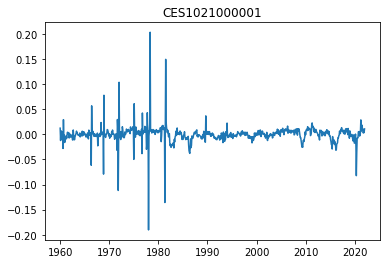

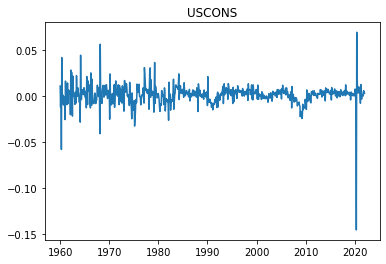

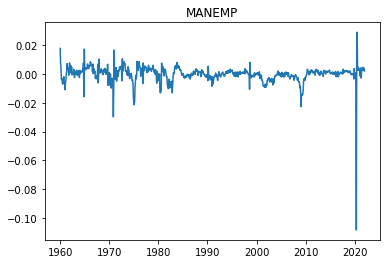

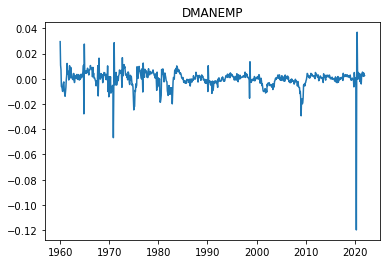

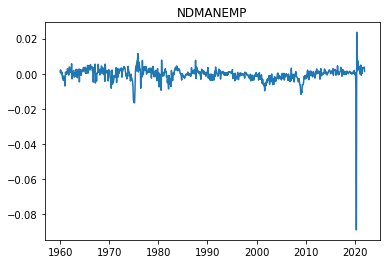

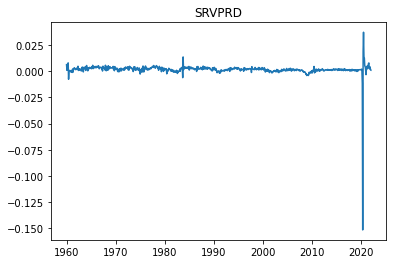

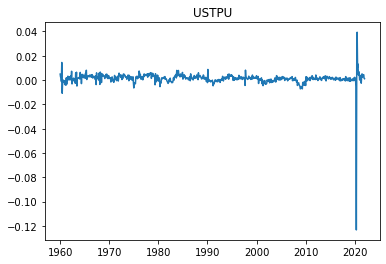

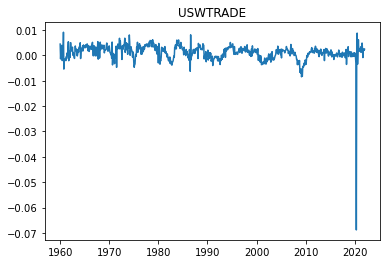

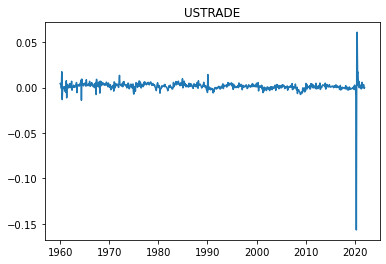

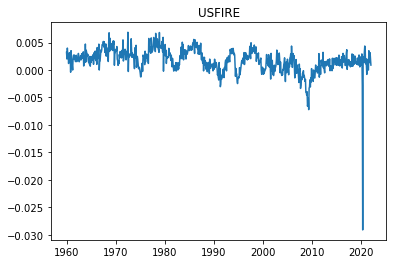

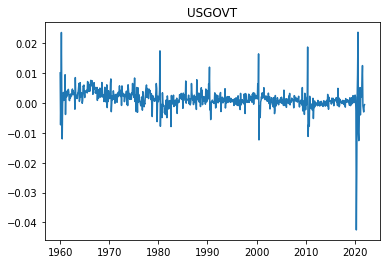

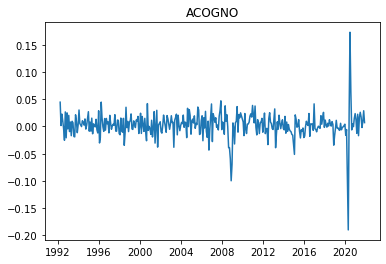

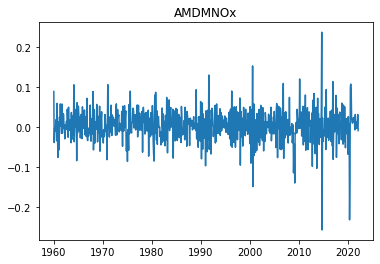

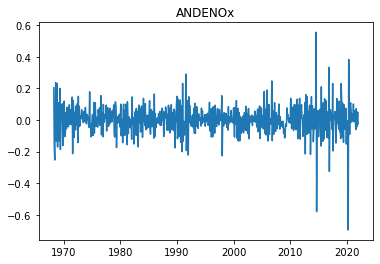

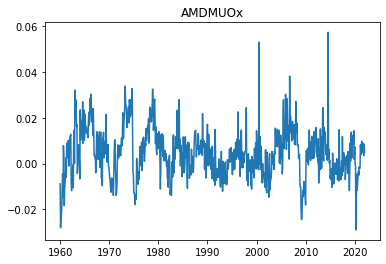

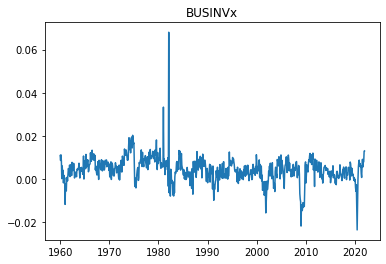

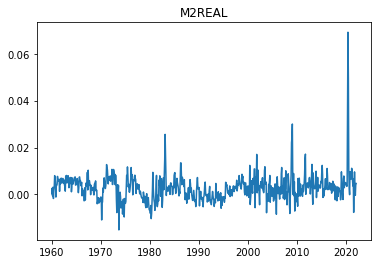

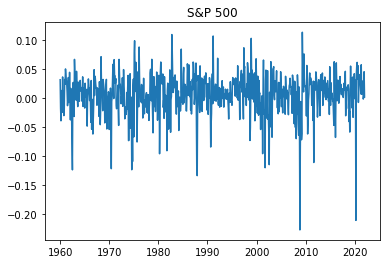

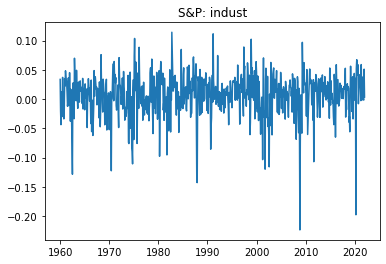

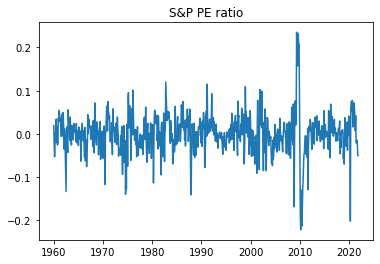

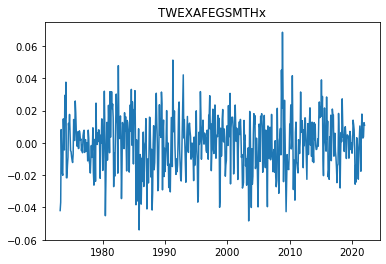

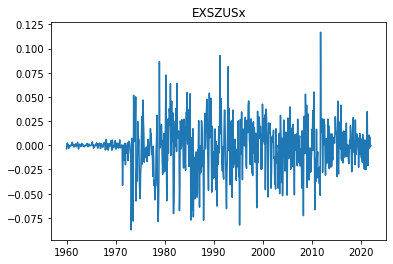

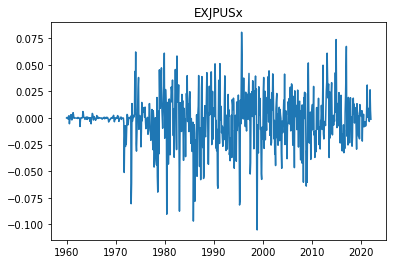

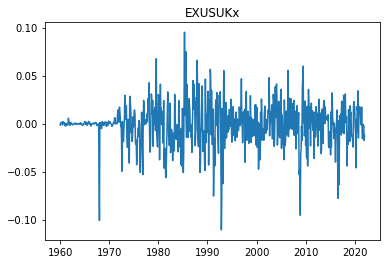

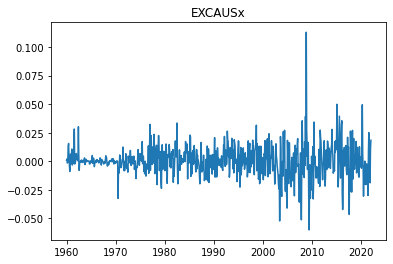

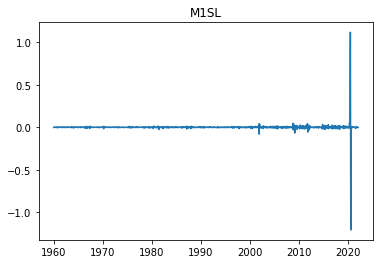

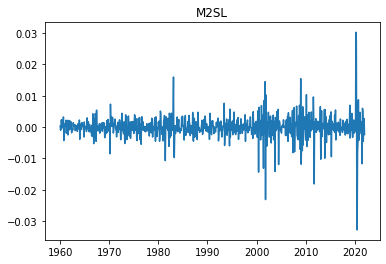

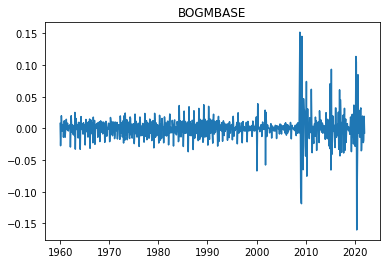

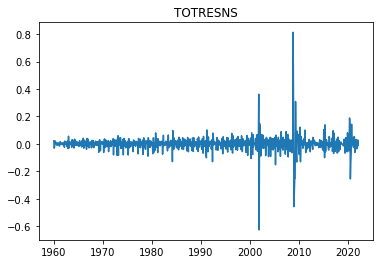

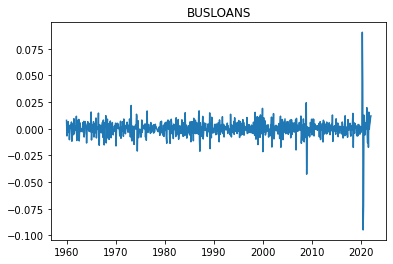

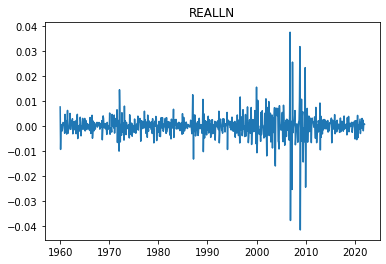

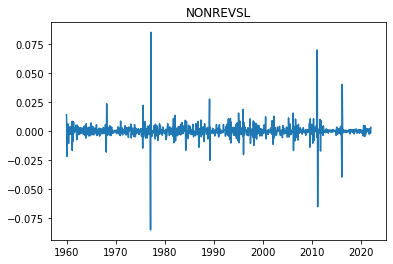

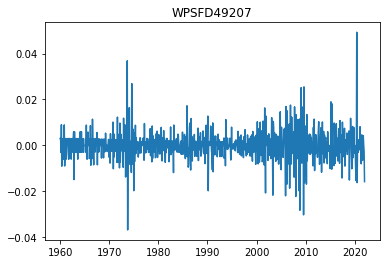

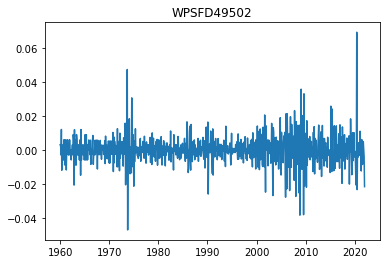

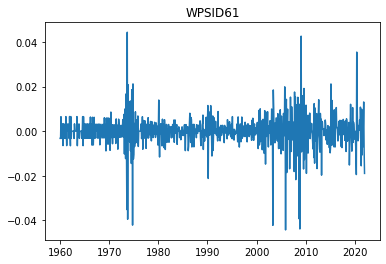

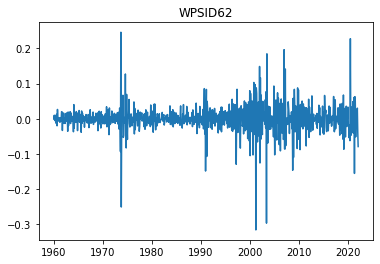

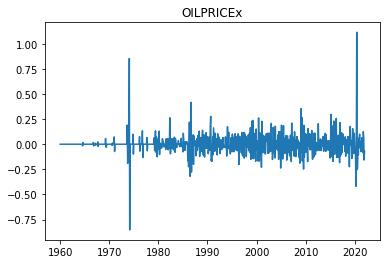

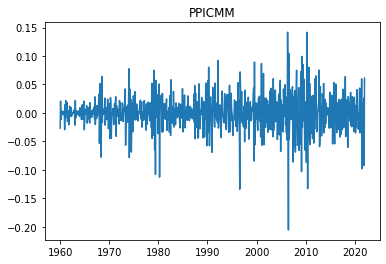

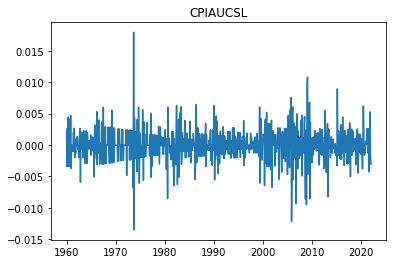

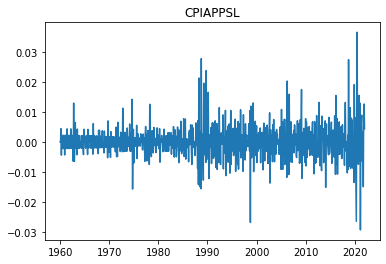

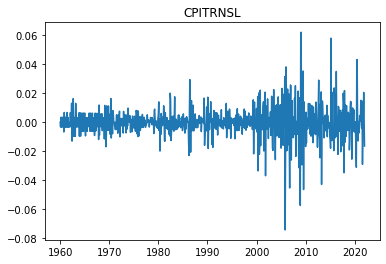

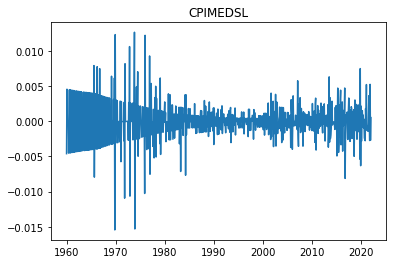

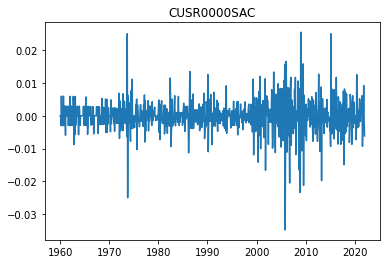

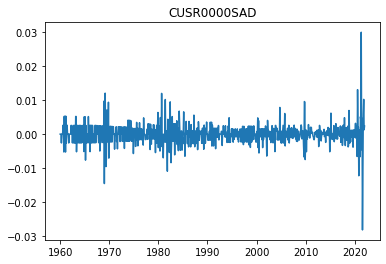

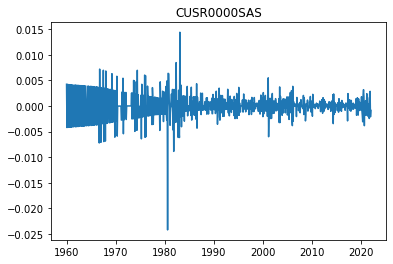

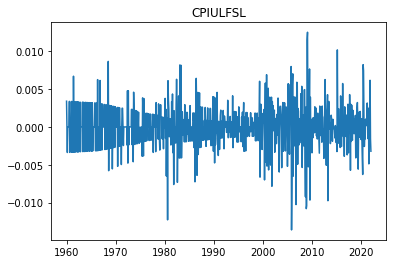

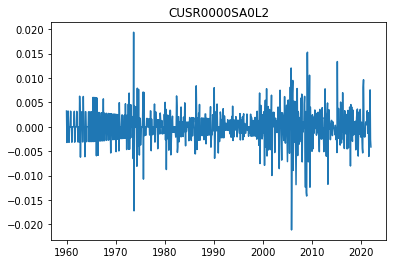

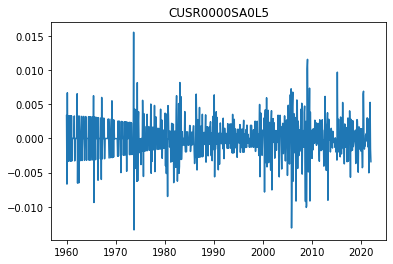

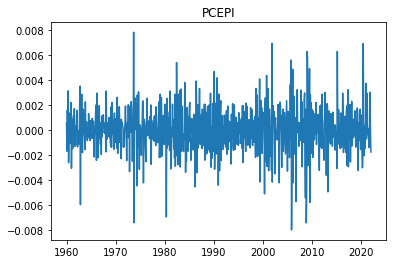

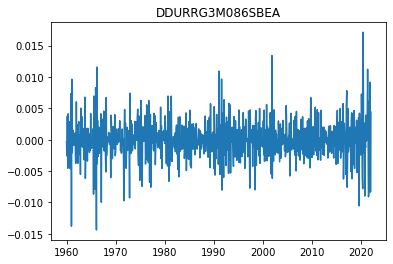

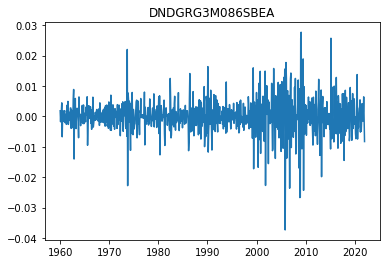

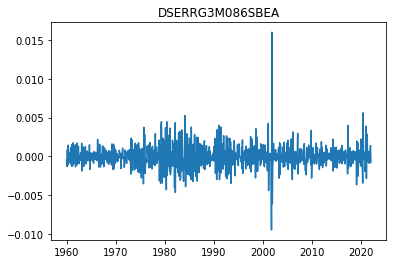

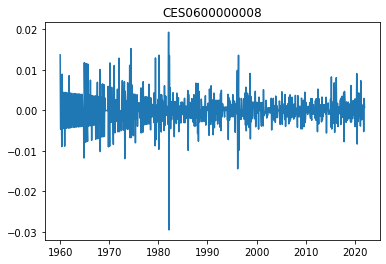

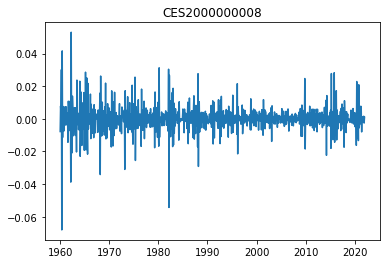

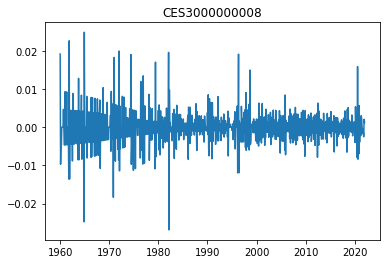

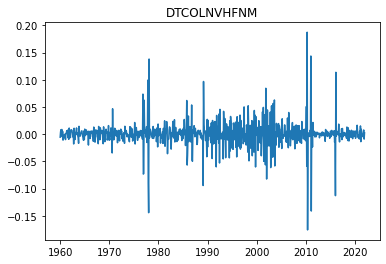

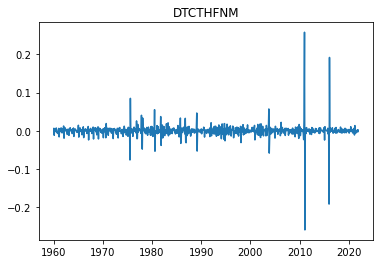

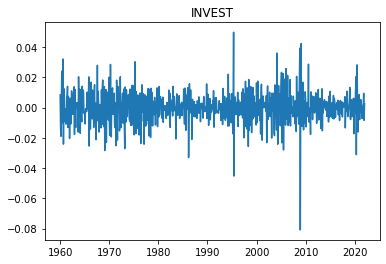

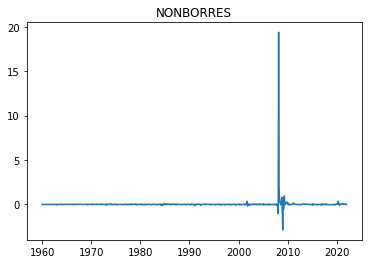

In [35]:
for col in agg_df.columns:
    plt.plot(agg_df[col])
    plt.title(col)
    plt.show()

In [36]:
#Save the processed macro dataframe to a project file
agg_df.to_csv("C:/Users/andrew_lazzeri/Desktop/Project_Files/Data Upload/Macroeconomic_Training_Data.csv")